In [13]:
def ohem_single(score, gt_text, training_mask):
    pos_num = (int)(np.sum(gt_text > 0.5)) - (int)(np.sum((gt_text > 0.5) & (training_mask <= 0.5)))
    
    if pos_num == 0:
        # selected_mask = gt_text.copy() * 0 # may be not good
        selected_mask = training_mask
        selected_mask = selected_mask.reshape(1, selected_mask.shape[0], selected_mask.shape[1]).astype('float32')
        return selected_mask
    
    neg_num = (int)(np.sum(gt_text <= 0.5))
    neg_num = (int)(min(pos_num * 3, neg_num))
    
    if neg_num == 0:
        selected_mask = training_mask
        selected_mask = selected_mask.reshape(1, selected_mask.shape[0], selected_mask.shape[1]).astype('float32')
        return selected_mask

    neg_score = score[gt_text <= 0.5]
    neg_score_sorted = np.sort(-neg_score)
    threshold = -neg_score_sorted[neg_num - 1]
    print("threshold:{}".format(threshold))
    selected_mask = ((score >= threshold) | (gt_text > 0.5)) & (training_mask > 0.5)
    selected_mask = selected_mask.reshape(1, selected_mask.shape[0], selected_mask.shape[1]).astype('float32')
    return selected_mask

In [14]:
import numpy as np

In [29]:
shape = (100, 100)
score = np.random.uniform(-1, 1,size=shape)
# gt_text = np.random.randint(0, 2, size=(10, 10))
gt_text = np.zeros(shape)
gt_text[3:10, 5:10] = 1
training_mask = np.ones(shape)

In [30]:
score, gt_text

(array([[ 0.54021871,  0.87052609, -0.70041115, ...,  0.54204222,
          0.78276625, -0.90687682],
        [-0.69099489, -0.14696117,  0.35017133, ...,  0.57483648,
         -0.26368373, -0.96566309],
        [ 0.79261225,  0.88669783, -0.5781512 , ...,  0.63937726,
          0.85404415, -0.43118085],
        ...,
        [-0.11003276,  0.18394637,  0.59258016, ...,  0.78587125,
         -0.66480906, -0.87486112],
        [ 0.37268805,  0.36746483, -0.60851167, ..., -0.16243402,
          0.94772687,  0.24306735],
        [ 0.46688133,  0.01615634,  0.48327913, ..., -0.97012139,
          0.88609646, -0.25251965]]), array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [31]:
sel_mask = ohem_single(score, gt_text, training_mask)

threshold:0.9763981585609383


In [33]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/gengjiajia/libs/gjj_tf3.x/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shape']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


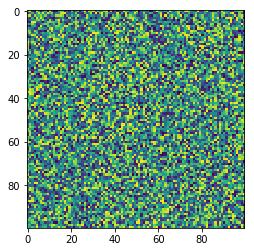

In [34]:
plt.imshow(score)

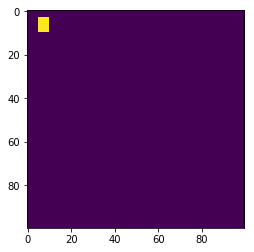

In [35]:
plt.imshow(gt_text)

In [ ]:
plt.imshow(sel)